# Notebook Purpose

Setting up scripts to train CNN. This was saved as a python file and then used for launching training jobs.

In [1]:
#!/usr/bin/env python
from __future__ import print_function, division
# coding: utf-8

# In[1]:


import torch
import sys
import antialiased_cnns
# from torchvision import datasets, models, transforms

from PIL import Image
import torchvision

sys.path.append('/om5/user/smadan/training_scaffold_own/res/')
from models.models import get_model
from loader.loader import get_loader
import random
import pickle
import argparse
import wandb

# parser = argparse.ArgumentParser()
# parser.add_argument('--num_epochs', type = int, default = 50)
# parser.add_argument('--model_arch', type = str, default = 'resnet18')
# parser.add_argument('--batch_size', type = int, default = 100)
# parser.add_argument('--num_classes', type = int, default = 11)
# parser.add_argument('--base_lr', type = float, default = 0.001)
# parser.add_argument('--use_gpu', type = bool, default = True)
# parser.add_argument('--run_name', type = str)
# parser.add_argument('--pretrained', action='store_true')
# parser.add_argument('--image_size', type = int, default = 224)
# parser.add_argument('--dataset_name', type = str, required = True)
# parser.add_argument('--normalize', action = 'store_true')
# parser.add_argument('--random_crop', action = 'store_true')
# parser.add_argument('--freeze', action = 'store_true')
# parser.add_argument('--lr_decay_step', type = int, default = -1)
# args = parser.parse_args()
wandb_config = {}
wandb_config['num_epochs'] = 50
wandb_config['model_arch'] = 'TRULY_SHIFT_INVARIANT'
wandb_config['batch_size'] = 100
wandb_config['num_classes'] = 11
wandb_config['base_lr'] = 0.001
wandb_config['use_gpu'] = True
wandb_config['run_name'] = 'normalization_test'
wandb_config['pretrained'] = False
wandb_config['image_size'] = 224
# wandb_config['dataset_name'] = 'image_train_v7_shapenet'
wandb_config['dataset_name'] = 'image_captured_data_completely_randomized_5000'
wandb_config['normalize'] = True
wandb_config['random_crop'] = True


# wandb.login()

# wandb_config = dict(vars(args))
# wandb.login()
# NUM_EPOCHS = args.num_epochs
# BATCH_SIZE = args.batch_size
# MODEL_ARCH = args.model_arch
# NUM_CLASSES = args.num_classes
# BASE_LR = args.base_lr
# USE_GPU = args.use_gpu
# SAVE_PATH = args.save_path
# LOG_FILE = args.log_file
# DATASET_NAME = args.dataset_name
if wandb_config['random_crop'] == True:
    print('Random crops enabled')

# LOG_FILE_HANDLE = open(LOG_FILE, 'w')




# In[4]:


import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import copy
import os
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import collections
from collections import OrderedDict
from tqdm import tqdm


input_img_size = wandb_config['image_size']

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

imagenet_trainsforms = {}
imagenet_trainsforms['train'] = transforms.Compose([
    transforms.RandomSizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    normalize,
])

imagenet_trainsforms['test'] = transforms.Compose([
    transforms.Scale(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize,
])

transforms_without_crop = transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
    ])
transforms_with_crop = transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.RandomResizedCrop(224),
    ])


if wandb_config['dataset_name'] == 'imagenet':
    image_transform = {}
    image_transform['train'] = imagenet_trainsforms['train']
    image_transform['test'] = imagenet_trainsforms['test']
else:
    image_transform = {}
    image_transform['train'] = transforms_without_crop
    image_transform['test'] = transforms_without_crop

#### Below was implemented for LeNet, leave commented ####
# image_transform = transforms.Compose([
#     transforms.Resize((input_img_size,input_img_size)),
#     transforms.Grayscale(),
#     transforms.ToTensor()
# #     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
# ])

if wandb_config['dataset_name'] == 'imagenet':
    loader_new = get_loader('multi_attribute_loader_file_list_imagenet')
else:
    loader_new = get_loader('multi_attribute_loader_file_list_shapenet')
file_list_root = '/om5/user/smadan/dataset_lists_openmind'
att_path = '/om5/user/smadan/differentiable_graphics_ml/training_models/shapenet_id_to_class_num.p'
shuffles = {'train':True,'val':True,'test':False}

# if wandb_config['use_gpu']:
#     torch.cuda.set_device(0)

count=0

file_lists = {}
dsets = {}
dset_loaders = {}
dset_sizes = {}
for phase in ['train','test']:
    file_lists[phase] = "%s/%s_list_%s.txt"%(file_list_root,phase,wandb_config['dataset_name'])
    dsets[phase] = loader_new(file_lists[phase],att_path, image_transform[phase])
    dset_loaders[phase] = torch.utils.data.DataLoader(dsets[phase], batch_size=wandb_config['batch_size'], shuffle = shuffles[phase], num_workers=2,drop_last=True)
    dset_sizes[phase] = len(dsets[phase])

/om5/user/smadan/training_scaffold_own/res/loader/multi_attribute_loader.py
/om5/user/smadan/training_scaffold_own/res/loader
/om5/user/smadan/training_scaffold_own/res/loader/loader.py
/om5/user/smadan/training_scaffold_own/res/loader
Random crops enabled


/om5/user/smadan/miniconda3/envs/diff_rendering_ml/lib/python3.8/site-packages/torchvision/transforms/transforms.py:886: UserWarning: The use of the transforms.RandomSizedCrop transform is deprecated, please use transforms.RandomResizedCrop instead.
  warnings.warn("The use of the transforms.RandomSizedCrop transform is deprecated, " +
/om5/user/smadan/miniconda3/envs/diff_rendering_ml/lib/python3.8/site-packages/torchvision/transforms/transforms.py:285: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [4]:
import timm
model_name = 'vit_base_patch16_224'
model = timm.create_model(model_name, pretrained=True)

In [8]:
model.head = nn.Linear(768, 11)

In [9]:
model

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): ModuleList(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU()
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
    )
    (1): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (

In [2]:
def input_shift_batch(arr, w_shift, h_shift):
    empty_arr = torch.zeros((arr.shape))
    
    if w_shift <0 and h_shift<0:
        empty_arr[:,:,:224+h_shift,:224+w_shift] = arr[:,:,-h_shift:,-w_shift:]
    elif w_shift >=0 and h_shift >=0:
        empty_arr[:,:,h_shift:,w_shift:] = arr[:,:,:arr.shape[2]-h_shift,:arr.shape[3]-w_shift]
    elif w_shift >=0 and h_shift <0:
        empty_arr[:,:,:224+h_shift,w_shift:] = arr[:,:,-h_shift:,:arr.shape[3]-w_shift]
    elif w_shift <0 and h_shift >=0:
        empty_arr[:,:,h_shift:,:224+w_shift] = arr[:,:,:arr.shape[2]-h_shift,-w_shift:]
    
    return empty_arr
    

In [3]:
criterion = nn.CrossEntropyLoss()

In [17]:
model = models.resnet18(pretrained = False)
model = models.resnet18(pretrained = wandb_config['pretrained'])
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, wandb_config['num_classes'])
model = model.cuda();

In [18]:
optimizer = optim.Adam(model.parameters(), lr = wandb_config['base_lr'])

In [19]:
# labels

In [20]:
# outputs

In [21]:
# criterion(outputs, labels)

In [22]:
# wandb_config['use_gpu']

In [23]:
import math

In [24]:
for data in tqdm(dset_loaders['train']):
    inputs, labels, image_paths = data
    break

  0%|          | 0/200 [00:16<?, ?it/s]


In [25]:
labels

tensor([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 3, 2, 1, 1, 3, 3, 1, 0, 3, 1,
        3, 1, 0, 1, 2, 1, 0, 2, 3, 1, 1, 3, 1, 2, 2, 0, 3, 2, 2, 2, 2, 2, 3, 3,
        0, 1, 0, 3, 1, 0, 2, 1, 2, 3, 3, 3, 3, 0, 3, 3, 1, 0, 1, 3, 3, 1, 3, 3,
        2, 2, 1, 0, 1, 2, 1, 1, 0, 2, 0, 2, 1, 0, 3, 3, 2, 3, 2, 3, 1, 3, 3, 2,
        0, 2, 2, 2])

In [11]:
for data in tqdm(dset_loaders['train']):
    inputs, labels, image_paths = data
    inputs_orig = inputs.clone()
    if wandb_config['use_gpu']:
        inputs = inputs.float().cuda()
        labels = labels.long().cuda()
    else:
        print('WARNING: NOT USING GPU!')
        inputs = inputs.float()
        labels = labels.long()
        
    if wandb_config['random_crop'] == True:
        random_shift_w = random.randint(-4,4)
        random_shift_h = random.randint(-4,4)
        inputs = input_shift_batch(inputs, random_shift_w, random_shift_h)
    if wandb_config['use_gpu']:
        inputs = inputs.float().cuda()
    
    if wandb_config['normalize'] == True:
        im_means = torch.mean(inputs.view(inputs.shape[0], -1),dim=1).unsqueeze(1).unsqueeze(1).unsqueeze(1)
        im_stds = torch.std(inputs.view(inputs.shape[0], -1),dim=1).unsqueeze(1).unsqueeze(1).unsqueeze(1)
        inputs = torch.nan_to_num((inputs - im_means)/im_stds)
    optimizer.zero_grad()
    outputs = model(inputs)
#     _, preds = torch.max(outputs.data, 1)

    loss = criterion(outputs, labels)
    if torch.isnan(loss):
        break
#     loss.backward()
#     optimizer.step()

  0%|          | 2/905 [00:01<14:49,  1.02it/s]


In [12]:
for i in range(100):
    if torch.isnan(torch.sum(inputs[i])):
        break

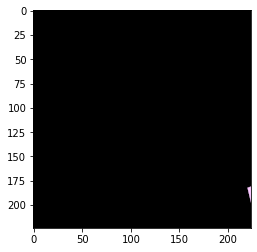

In [18]:
plt.imshow(inputs_orig[i].detach().permute(1,2,0))

In [17]:
torch.sum(inputs_orig[i])

tensor(87.0627)

In [19]:
# inputs.shape

In [ ]:

def test_model(model, best_acc, best_model, configs):
    if configs.normalize == True:
        print('Images will be normalized')
    model.eval()

    running_corrects = 0
    iters = 0
    for data in tqdm(dset_loaders['test']):
        inputs, labels, image_paths = data
        if configs.use_gpu:
            inputs = inputs.float().cuda()
            labels = labels.long().cuda()
        else:
            print('WARNING: NOT USING GPU!')
            inputs = inputs.float()
            labels = labels.long()


        if configs.normalize == True:
            im_means = torch.mean(inputs.view(configs.batch_size, -1),dim=1).unsqueeze(1).unsqueeze(1).unsqueeze(1)
            im_stds = torch.std(inputs.view(configs.batch_size, -1),dim=1).unsqueeze(1).unsqueeze(1).unsqueeze(1)
            inputs = (inputs - im_means)/im_stds

        outputs = model(inputs)
        _, preds = torch.max(outputs.data, 1)

        iters += 1
        running_corrects += torch.sum(preds == labels.data)
        wandb.log({"train_running_corrects": running_corrects/float(iters*len(labels.data))})


    epoch_acc = float(running_corrects) / float(dset_sizes['test'])

    wandb.log({"test_accuracy": epoch_acc})

    if epoch_acc > best_acc:
        best_acc = epoch_acc
        best_model = copy.deepcopy(model)
    wandb.log({"best_accuracy": best_acc})

    save_path = '/om5/user/smadan/differentiable_graphics_ml/training_models/saved_models/%s.pt'%configs.run_name
    with open(save_path,'wb') as F:
        torch.save(best_model, F)

    return best_acc, best_model



def train_model(model, criterion, optimizer, configs):
    if configs.normalize == True:
        print('Images will be normalized')
    best_model = model
    best_acc = 0.0

    model.train()
    running_loss = 0.0
    running_corrects = 0
    iters = 0

    for data in tqdm(dset_loaders['train']):
        inputs, labels, image_paths = data
        if configs.use_gpu:
            inputs = inputs.float().cuda()
            labels = labels.long().cuda()
        else:
            print('WARNING: NOT USING GPU!')
            inputs = inputs.float()
            labels = labels.long()
        if configs.random_crop == True:
            random_shift_w = random.randint(-4,4)
            random_shift_h = random.randint(-4,4)
            inputs = input_shift_batch(inputs, random_shift_w, random_shift_h)
            
        if configs.normalize == True:
            im_means = torch.mean(inputs.view(configs.batch_size, -1),dim=1).unsqueeze(1).unsqueeze(1).unsqueeze(1)
            im_stds = torch.std(inputs.view(configs.batch_size, -1),dim=1).unsqueeze(1).unsqueeze(1).unsqueeze(1)
            inputs = (inputs - im_means)/im_stds

        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs.data, 1)

        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        iters += 1
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data)
        wandb.log({"train_running_loss": running_loss/float(iters*len(labels.data))})
        wandb.log({"train_running_corrects": running_corrects/float(iters*len(labels.data))})

    epoch_loss = float(running_loss) / dset_sizes['train']
    epoch_acc = float(running_corrects) / float(dset_sizes['train'])
    wandb.log({"train_accuracy": epoch_acc})
    wandb.log({"train_loss": epoch_loss})
    return model

def model_pipeline(model, criterion, optimizer, hyperparameters):
    with wandb.init(project="pytorch-test", config=hyperparameters):
        if hyperparameters['run_name']:
            wandb.run.name = hyperparameters['run_name']
        config = wandb.config
        best_model = model
        best_acc = 0.0

        print(config)

        print(config.num_epochs)
        for epoch_num in range(config.num_epochs):
            if wandb_config['lr_decay_step'] != -1:
                decay_factor = 10**(int(epoch_num/wandb_config['lr_decay_step']))
                optimizer = optim.Adam(model.parameters(), lr = wandb_config['base_lr']/decay_factor)
            wandb.log({"Current Epoch": epoch_num})
            model = train_model(model, criterion, optimizer, config)
            best_acc, best_model = test_model(model, best_acc, best_model, config)

    return best_model

############# create model, criterion and optimizer ########
print('Checking it for you - ',wandb_config['pretrained'])
if wandb_config['model_arch'] == 'resnet18':
    model = models.resnet18(pretrained = wandb_config['pretrained'])
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, wandb_config['num_classes'])

    if wandb_config['freeze']:
        child_count = 0
        for child in model.children():
            if child_count > 2 and child_count < 9:
                for param in child.parameters():
                    param.requires_grad = False
            child_count += 1
elif wandb_config['model_arch'] == 'resnet18_antialiased':
    model = antialiased_cnns.resnet18(pretrained = False)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, wandb_config['num_classes'])
elif wandb_config['model_arch'] == 'resnet50':
    model = models.resnet50(pretrained=wandb_config['pretrained'])
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, wandb_config['num_classes'])
elif wandb_config['model_arch'] == 'resnet152':
    model = models.resnet152(pretrained=False)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, wandb_config['num_classes'])
elif wandb_config['model_arch'] == 'densenet':
    model = models.densenet121(pretrained = False, num_classes = wandb_config['num_classes'])
elif wandb_config['model_arch'] == 'alexnet':
    model = models.alexnet(pretrained=wandb_config['pretrained'])
    num_ftrs = model.classifier[-1].in_features
    model.classifier[-1] = nn.Linear(num_ftrs, wandb_config['num_classes'])
elif wandb_config['model_arch'] == 'alexnet_less_wide':
    model = models.alexnet_less_wide(pretrained=wandb_config['pretrained'])
    num_ftrs = model.classifier[-1].in_features
    model.classifier[-1] = nn.Linear(num_ftrs, wandb_config['num_classes'])
elif wandb_config['model_arch'] == 'simple_cnn':
    model = nn.Sequential(OrderedDict([
            ('conv1', nn.Conv2d(3,64,1)),
            ('relu1', nn.ReLU()),
            ('pool1', nn.AvgPool2d(4)),
            ('conv2', nn.Conv2d(64,32,1)),
            ('relu2', nn.ReLU()),
            ('pool2', nn.AvgPool2d(16)),
            ('flatten', nn.Flatten()),
            ('fc', nn.Linear(288,wandb_config['num_classes'])),
        ]))
else:
    model = get_model(wandb_config['model_arch'],wandb_config['num_classes'])
print(model)
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.Adam(model.parameters(), lr = wandb_config['base_lr'])

if wandb_config['use_gpu']:
    criterion.cuda()
    model.cuda()
    model = nn.DataParallel(model)


###########################################################



best_final_model = model_pipeline(model, criterion, optimizer_ft, wandb_config)

save_path = '/om5/user/smadan/differentiable_graphics_ml/training_models/saved_models/%s_final.pt'%wandb_config['run_name']

with open(save_path,'wb') as F:
    torch.save(best_final_model,F)

In [1]:
wandb_config = {}
wandb_config['num_epochs'] = 50
wandb_config['model_arch'] = 'TRULY_SHIFT_INVARIANT'
wandb_config['batch_size'] = 100
wandb_config['num_classes'] = 11
wandb_config['base_lr'] = 0.001
wandb_config['use_gpu'] = True
wandb_config['run_name'] = 'normalization_test'
wandb_config['pretrained'] = False
wandb_config['image_size'] = 224
wandb_config['dataset_name'] = 'imagenet'
wandb_config['normalize'] = True

wandb.login()

NameError: name 'wandb' is not defined